In [1]:
%matplotlib inline
#import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py, nilearn
from joblib import Memory
cache_dir = '/Users/Miki/Desktop/ml/cache_dir'
mem = Memory(cache_dir)

base_path = "/Users/Miki/Desktop/ml/"

In [2]:
# read sample data
mat_10001 = h5py.File(f'{base_path}10001.mat','r')
data_10001 = mat_10001['SM_feature']
#convert to np array
array_10001 = data_10001[()]
# flip axis
flipped_10001 = np.moveaxis(array_10001, [0,1,2,3], [3,2,1,0])
print(array_10001.shape)

(53, 52, 63, 53)


In [3]:
# 3d scatterplot of one scan for reference
#flip axis
# flipped_10001 = np.moveaxis(array_10001, [0,1,2,3], [3,2,1,0])
# xs = np.squeeze(flipped_10001[:, 1, 1, 1], axis=1, 2, 3)
# ys = np.squeeze(flipped_10001[1, :, 1, 1], axis=0, 2, 3)
# zs = np.squeeze(flipped_10001[1, 1, :, 1], axis=0, 1, 3)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=xs,ys=ys, zs=zs)

# TO BE IMPROVED

In [4]:
# convert to nifti
from nibabel.nifti1 import Nifti1Image
from nilearn import image

mask_nimg = nilearn.image.load_img(base_path + 'fMRI_mask.nii')
nifti_10001 = Nifti1Image(flipped_10001, affine=mask_nimg.affine)


In [5]:
# This object uses method='kmeans' for KMeans clustering with 10mm smoothing
# and standardization ON
import time
from nilearn.regions import Parcellations

mask_nimg = nilearn.image.load_img(base_path + 'fMRI_mask.nii')


start = time.time()
kmeans = Parcellations(method='kmeans', n_parcels=50, mask=mask_nimg,
                       standardize=True, smoothing_fwhm=10.,
                       memory=mem, memory_level=1,
                       verbose=1)
# Call fit on functional dataset: single subject (less samples)
kmeans.fit(nifti_10001)

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data


/Users/Miki/Desktop/ml/my_env/lib/python3.8/site-packages/nilearn/_utils/cache_mixin.py:296: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing kmeans


Parcellations(detrend=False, high_pass=None, low_pass=None,
              mask=<nibabel.nifti1.Nifti1Image object at 0x11e7bf670>,
              mask_args=None, mask_strategy='epi',
              memory=Memory(location=/Users/Miki/Desktop/ml/cache_dir/joblib),
              memory_level=1, method='kmeans', n_iter=10, n_jobs=1,
              n_parcels=50, random_state=0, scaling=False, smoothing_fwhm=10.0,
              standardize=True, t_r=None, target_affine=None, target_shape=None,
              verbose=1)

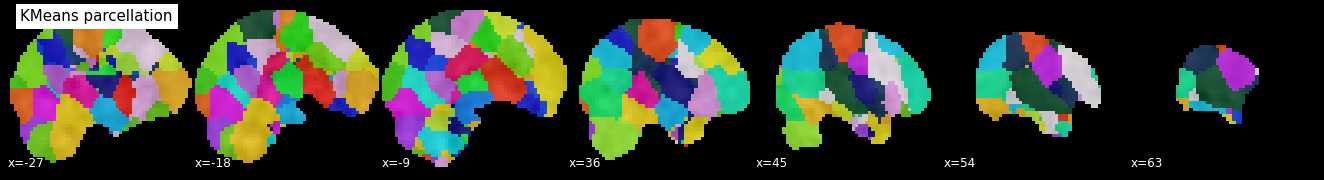

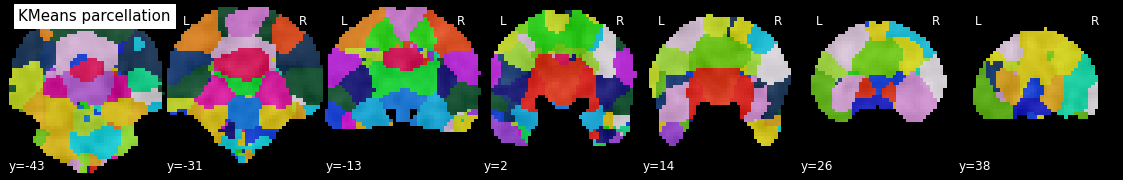

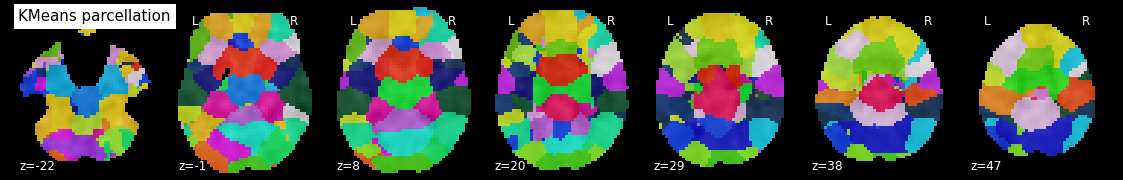

In [6]:
from nilearn import plotting
from nilearn.image import mean_img
# Compute mean over time on the functional image to use the mean
# image for compressed representation comparisons
mean_func_img = mean_img(nifti_10001)

kmeans_labels_img = kmeans.labels_img_

plotting.plot_roi(kmeans_labels_img, mean_func_img,
                  title="KMeans parcellation",
                  display_mode='x')

plotting.plot_roi(kmeans_labels_img, mean_func_img,
                  title="KMeans parcellation",
                  display_mode='y')

plotting.plot_roi(kmeans_labels_img, mean_func_img,
                  title="KMeans parcellation",
                  display_mode='z')

# kmeans_labels_img is a Nifti1Image object, it can be saved to file with
# the following code:
#kmeans_labels_img.to_filename('kmeans_parcellation.nii.gz')


In [7]:
#plot parcellation kmeans centroids
#TO BE CONTINUED